In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import shap

In [38]:
prospect_firmographic_data=pd.read_csv('../datasets/clicked_data/prospect_firmographic_data.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_28724\327420378.py:1: DtypeWarning: Columns (11,14,15,16,20,25,28,34) have mixed types. Specify dtype option on import or set low_memory=False.
  prospect_firmographic_data=pd.read_csv('../datasets/clicked_data/prospect_firmographic_data.csv')


In [40]:
prospect_engagement_data=pd.read_csv('../datasets/clicked_data/final_dataset.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_28724\898958935.py:1: DtypeWarning: Columns (8,11,14,15,16,23,27,28,29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  prospect_engagement_data=pd.read_csv('../datasets/clicked_data/final_dataset.csv')


In [44]:
prospect_engagement_data.drop(columns=['Unnamed: 0'],inplace=True)

In [46]:
prospect_firmographic_data.drop(columns=['Unnamed: 0'],inplace=True)

In [48]:
pd.options.display.max_columns=None
pd.options.display.max_info_columns=1000

In [52]:
prospect_firmographic_data[['Email ID','level','Department','Country','Industry']]

,Email ID,level,Department,Country,Industry
0,miller.roxanne@albertsons.com,CXO,Finance,United States,Retail
1,michael.rich@albertsons.com,Dir,Finance,United States,Retail
2,barach.fugitt@albertsons.com,Dir,Finance,United States,Retail
3,teri.wiggins@albertsons.com,Dir,Finance,United States,Retail
4,kat.chin@albertsons.com,Dir,Operations,United States,Retail
...,...,...,...,...,...
156038,aantone@dollartree.com,Mgr,Operations,United States,Retail
156039,jdolosic@dollartree.com,Mgr,Operations,United States,Retail
156040,hforte@dollartree.com,Mgr,Operations,United States,Retail
156041,bdickey@dollartree.com,Mgr,Operations,United States,Retail


In [54]:
prospect_firmographic_data['Email ID'].isnull().sum()

3

In [56]:
prospect_firmographic_data['Email ID'].duplicated().sum()

1594

In [58]:
prospect_firmographic_data.dropna(subset=['Email ID'],inplace=True)

In [60]:
prospect_firmographic_data.drop_duplicates(subset=['Email ID'],inplace=True)

In [62]:
prospect_engagement_data.shape

(157572, 46)

In [64]:
prospect_firmographic_data.shape

(154448, 38)

In [66]:
clicked_prospects=prospect_engagement_data[prospect_engagement_data['is_clicked_email']==1]

In [68]:
clicked_prospects.shape

(9521, 46)

In [70]:
clicked_prospects['derived_mail'].nunique()

9521

In [72]:
    clicked_prospects[clicked_prospects['derived_mail'].isin(prospect_firmographic_data['Email ID'].unique())]

,derived_mail,Company Name,First Name,Middle Name,Last Name,Title,Level,Seniority,Department,Email ID,Email 1,Contact_City,Contact_State,Contact City,Contact State,Contact Country,Country,Website,Company City,Company State,Company Country,Industry,Sub Industry,Revenue,Revenue Range,EMP Range,Company Annual Revenue,Company Industry,Company Staff Count Range,Company Staff Count,Contact Linkedin URL,Contact LI Profile URL,source,Email,total_emails_sent,total_emails_opened,total_emails_clicked,total_emails_bounced,total_emails_unsubscribed,avg_time_between_emails,avg_time_between_emails_opened,days_since_last_email_opened,total_emails_sent_week_ends,has_ever_opened_email,is_clicked_email,has_ever_unsubscribed_email
0,a-holley@ti.com,Texas Instruments,Ashley,NaN,Holley,Creative Operations Manager,Mgr,NaN,Operations,a-holley@ti.com,NaN,Dallas,TX,NaN,NaN,NaN,United States,www.ti.com,Dallas,TX,United States,Manufacturing,NaN,$17.5B,10B+,"10,000+",NaN,NaN,NaN,NaN,https://www.linkedin.com/in/ashleyjholley,NaN,../datasets/latest_dataset/Schneider_Electric_...,a-holley@ti.com,23.0,1.0,1.0,0.0,0.0,1.318182,NaN,0.0,5.0,1,1,0
1,a-smith3@ti.com,Texas Instruments,Amanda,NaN,Smith,Vice President Analog Power Products Supply Ch...,VP,NaN,Operations,a-smith3@ti.com,NaN,Dallas,TX,NaN,NaN,NaN,United States,www.ti.com,Dallas,TX,United States,Manufacturing,NaN,$17.5B,10B+,"10,000+",NaN,NaN,NaN,NaN,https://www.linkedin.com/in/amanda-smith-8b11475,NaN,../datasets/latest_dataset/Schneider_Electric_...,a-smith3@ti.com,17.0,1.0,1.0,0.0,0.0,0.937500,NaN,0.0,2.0,1,1,0
3,a.freitas@samsung.com,Samsung,Alex,NaN,Freitas,Sr Director of PMO and Operations,Dir,NaN,Operations,a.freitas@samsung.com,NaN,Dallas,TX,NaN,NaN,NaN,United States,www.samsung.com,Ridgefield Park,NJ,United States,Manufacturing,NaN,$197B,10B+,"10,000+",NaN,NaN,NaN,NaN,https://www.linkedin.com/in/alexfreitas,NaN,../datasets/latest_dataset/Schneider_Electric_...,a.freitas@samsung.com,57.0,1.0,1.0,0.0,0.0,0.857143,NaN,0.0,9.0,1,1,0
4,a.khani@samsung.com,Samsung,Aamer,NaN,Khani,Director Software Engineering,Dir,NaN,IT,a.khani@samsung.com,NaN,Dublin,CA,NaN,NaN,NaN,United States,www.samsung.com,NaN,NaN,NaN,Manufacturing,NaN,$197B,10B+,"10,000+",NaN,NaN,NaN,NaN,https://www.linkedin.com/in/aamer-khani-3225719,NaN,../datasets/latest_dataset/Schneider_Electric_...,a.khani@samsung.com,57.0,1.0,1.0,0.0,0.0,0.857143,NaN,0.0,9.0,1,1,0
5,a.kurian@samsung.com,Samsung,Anoop,NaN,Kurian,Director -Solution Architect E commerce engine...,Dir,NaN,IT,a.kurian@samsung.com,NaN,Houston,NaN,NaN,NaN,NaN,United States,www.samsung.com,Ridgefield Park,NJ,United States,Manufacturing,NaN,$197B,10B+,"10,000+",NaN,NaN,NaN,NaN,https://www.linkedin.com/in/anoop-kurian,NaN,../datasets/latest_dataset/Schneider_Electric_...,a.kurian@samsung.com,76.0,3.0,1.0,0.0,0.0,0.866667,33.5,0.0,13.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516,zluo@amazon.com,Amazon Robotics,Zhe,NaN,Luo,Software Development Engineer,Mgr,NaN,IT,zluo@amazon.com,NaN,Boston,NaN,NaN,NaN,NaN,United States,amazonrobotics.com,North Reading,MA,United States,Manufacturing,NaN,$1.6B,1B - 10B,51-200,NaN,NaN,NaN,NaN,https://www.linkedin.com/in/zhe-luo-800474a3,NaN,../datasets/latest_dataset/Schneider_Electric_...,zluo@amazon.com,6.0,1.0,1.0,0.0,0.0,7.200000,NaN,0.0,NaN,1,1,0
9517,zoe.taylor@walmart.com,Walmart,Zoe,NaN,Taylor,Director Dallas Innovation Hub,Dir,NaN,Operations,zoe.taylor@walmart.com,NaN,Dallas,TX,NaN,NaN,NaN,United States,walmart.com,Bentonville,AR,United States,Retail,NaN,$665B,NaN,"10,000+",NaN,NaN,NaN,NaN,https://www.linkedin.com/in/zoebtaylor,NaN,../datasets/latest_dataset/Schneider_Electric_...,zoe.taylor@walmart.com,41.0,1.0,1.0,0.0,0.0,0.450000,NaN,0.0,7.0,1,1,0
9518,zsolt.gyurko@flextronics.com,Flextronics,Zsolt,NaN,Gyurko,Hardware Design & Engineering Manager at Flex,Mgr,NaN,IT,zsolt.gyurko@flextronic

In [74]:
9521-8232

1289

In [76]:
prospect_firmographic_data=prospect_firmographic_data[['Email ID','level','Department','Country','Industry']]

In [80]:
prospect_engagement_data.columns

Index(['derived_mail', 'Company Name', 'First Name', 'Middle Name',
       'Last Name', 'Title', 'Level', 'Seniority', 'Department', 'Email ID',
       'Email 1', 'Contact_City', 'Contact_State', 'Contact City',
       'Contact State', 'Contact Country', 'Country', 'Website',
       'Company City', 'Company State', 'Company Country', 'Industry',
       'Sub Industry', 'Revenue', 'Revenue Range', 'EMP Range',
       'Company Annual Revenue', 'Company Industry',
       'Company Staff Count Range', 'Company Staff Count',
       'Contact Linkedin URL', 'Contact LI Profile URL', 'source', 'Email',
       'total_emails_sent', 'total_emails_opened', 'total_emails_clicked',
       'total_emails_bounced', 'total_emails_unsubscribed',
       'avg_time_between_emails', 'avg_time_between_emails_opened',
       'days_since_last_email_opened', 'total_emails_sent_week_ends',
       'has_ever_opened_email', 'is_clicked_email',
       'has_ever_unsubscribed_email'],
      dtype='object')

In [90]:
temp_prospect_engagement_data=prospect_engagement_data[['derived_mail','total_emails_sent', 'total_emails_opened', 'total_emails_clicked',
       'total_emails_bounced', 'total_emails_unsubscribed',
       'avg_time_between_emails', 'avg_time_between_emails_opened',
       'days_since_last_email_opened', 'total_emails_sent_week_ends',
       'has_ever_opened_email', 'is_clicked_email',
       'has_ever_unsubscribed_email']]

In [98]:
final_df=prospect_firmographic_data.merge(temp_prospect_engagement_data,left_on='Email ID',right_on='derived_mail',how='inner')

In [100]:
final_df.shape

(146039, 18)

In [102]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146039 entries, 0 to 146038
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Email ID                        146039 non-null  object 
 1   level                           146039 non-null  object 
 2   Department                      146039 non-null  object 
 3   Country                         146039 non-null  object 
 4   Industry                        146039 non-null  object 
 5   derived_mail                    146039 non-null  object 
 6   total_emails_sent               145563 non-null  float64
 7   total_emails_opened             145563 non-null  float64
 8   total_emails_clicked            145563 non-null  float64
 9   total_emails_bounced            145563 non-null  float64
 10  total_emails_unsubscribed       145563 non-null  float64
 11  avg_time_between_emails         131053 non-null  float64
 12  avg_time_between

In [104]:
final_df.isnull().sum()

Email ID                               0
level                                  0
Department                             0
Country                                0
Industry                               0
derived_mail                           0
total_emails_sent                    476
total_emails_opened                  476
total_emails_clicked                 476
total_emails_bounced                 476
total_emails_unsubscribed            476
avg_time_between_emails            14986
avg_time_between_emails_opened    138867
days_since_last_email_opened      130173
total_emails_sent_week_ends        23144
has_ever_opened_email                  0
is_clicked_email                       0
has_ever_unsubscribed_email            0
dtype: int64

is_clicked_email
0    9775
Name: count, dtype: int64

## Encoding Level

In [155]:
from sklearn.preprocessing import OneHotEncoder


In [171]:

# Initialize OneHotEncoder
level_encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the 'Industry' column
level_encoded = level_encoder.fit_transform(final_df[['level']])

# Retrieve the feature names
level_encoded_feature_names = level_encoder.get_feature_names_out(['level'])

# Create a DataFrame with the encoded features
level_encoded_df = pd.DataFrame(level_encoded, columns=level_encoded_feature_names, index=final_df.index)

# Concatenate the original DataFrame and the encoded DataFrame
level_df= pd.concat([final_df, level_encoded_df], axis=1)

# Optionally, drop the original 'Industry' column
level_df.drop('level', axis=1, inplace=True)

# level_df


In [173]:
level_encoded_df

,level_CXO,level_Dir,level_Head,level_Mgr,level_Others,level_Staff,level_VP
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
146034,0.0,1.0,0.0,0.0,0.0,0.0,0.0
146035,0.0,0.0,0.0,1.0,0.0,0.0,0.0
146036,0.0,0.0,0.0,1.0,0.0,0.0,0.0
146037,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Encoding Country

In [176]:

# Initialize OneHotEncoder
country_encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the 'Industry' column
country_encoded = country_encoder.fit_transform(final_df[['Country']])

# Retrieve the feature names
country_encoded_feature_names = country_encoder.get_feature_names_out(['Country'])

# Create a DataFrame with the encoded features
country_encoded_df = pd.DataFrame(country_encoded, columns=country_encoded_feature_names, index=final_df.index)

# # Concatenate the original DataFrame and the encoded DataFrame
# level_df= pd.concat([final_df, level_encoded_df], axis=1)

# # Optionally, drop the original 'Industry' column
# level_df.drop('level', axis=1, inplace=True)

# # level_df
country_encoded_df


,Country_Canada,Country_Mexico,Country_United States
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
146034,0.0,0.0,1.0
146035,0.0,0.0,1.0
146036,0.0,0.0,1.0
146037,0.0,0.0,1.0


In [182]:
prospect_firmographic_data['Country'].value_counts(dropna=False)

Country
United States     149377
Mexico              3095
United Kingdom      1700
Others               189
Canada                87
Name: count, dtype: int64

## Encoding Department

In [189]:

# Initialize OneHotEncoder
department_encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the 'Industry' column
department_encoded = department_encoder.fit_transform(final_df[['Department']])

# Retrieve the feature names
department_encoded_feature_names = department_encoder.get_feature_names_out(['Department'])

# Create a DataFrame with the encoded features
department_encoded_df = pd.DataFrame(department_encoded, columns=department_encoded_feature_names, index=final_df.index)

# # Concatenate the original DataFrame and the encoded DataFrame
# level_df= pd.concat([final_df, level_encoded_df], axis=1)

# # Optionally, drop the original 'Industry' column
# level_df.drop('level', axis=1, inplace=True)

# # level_df
department_encoded_df


,Department_After Sales Service/Support,Department_Engineering,Department_Executive,Department_Finance,Department_IT,Department_Operations,Department_Others,Department_Regulatory/Corporate Compliance,Department_Sales
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
146034,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
146035,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
146036,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
146037,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Encoding Industry

In [192]:

# Initialize OneHotEncoder
industry_encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the 'Industry' column
industry_encoded = industry_encoder.fit_transform(final_df[['Industry']])

# Retrieve the feature names
industry_encoded_feature_names = industry_encoder.get_feature_names_out(['Industry'])

# Create a DataFrame with the encoded features
industry_encoded_df = pd.DataFrame(industry_encoded, columns=industry_encoded_feature_names, index=final_df.index)

# # Concatenate the original DataFrame and the encoded DataFrame
# level_df= pd.concat([final_df, level_encoded_df], axis=1)

# # Optionally, drop the original 'Industry' column
# level_df.drop('level', axis=1, inplace=True)

# # level_df
industry_encoded_df


,Industry_Agriculture,Industry_Business Services,Industry_Construction,"Industry_Electricity, Oil & Gas, Energy, Utilities & Waste",Industry_Government,Industry_Manufacturing,Industry_Others,Industry_Retail,Industry_Transportation
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
146034,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
146035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
146036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
146037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [196]:
training_df=pd.concat([final_df, level_encoded_df,country_encoded_df,department_encoded_df,industry_encoded_df], axis=1)

In [202]:
training_df.drop(columns=['level','Country','Industry','Department'],inplace=True)

In [204]:
training_df.drop(columns=['derived_mail','Email ID'],inplace=True)

In [206]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146039 entries, 0 to 146038
Data columns (total 40 columns):
 #   Column                                                      Non-Null Count   Dtype  
---  ------                                                      --------------   -----  
 0   total_emails_sent                                           145563 non-null  float64
 1   total_emails_opened                                         145563 non-null  float64
 2   total_emails_clicked                                        145563 non-null  float64
 3   total_emails_bounced                                        145563 non-null  float64
 4   total_emails_unsubscribed                                   145563 non-null  float64
 5   avg_time_between_emails                                     131053 non-null  float64
 6   avg_time_between_emails_opened                              7172 non-null    float64
 7   days_since_last_email_opened                                15866 non-null

In [208]:
training_df['is_clicked_email'].value_counts()

is_clicked_email
0    137807
1      8232
Name: count, dtype: int64

In [210]:
training_df.to_csv('../datasets/clicked_data/training_df.csv')

In [218]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146039 entries, 0 to 146038
Data columns (total 40 columns):
 #   Column                                                      Non-Null Count   Dtype  
---  ------                                                      --------------   -----  
 0   total_emails_sent                                           145563 non-null  float64
 1   total_emails_opened                                         145563 non-null  float64
 2   total_emails_clicked                                        145563 non-null  float64
 3   total_emails_bounced                                        145563 non-null  float64
 4   total_emails_unsubscribed                                   145563 non-null  float64
 5   avg_time_between_emails                                     131053 non-null  float64
 6   avg_time_between_emails_opened                              7172 non-null    float64
 7   days_since_last_email_opened                                15866 non-null

In [220]:
dataset_1=training_df[['total_emails_sent', 'total_emails_opened', 'total_emails_clicked',
       'total_emails_bounced', 'total_emails_unsubscribed',
       # 'avg_time_between_emails', 'avg_time_between_emails_opened',
       'days_since_last_email_opened', 'total_emails_sent_week_ends',
       'has_ever_opened_email', 'is_clicked_email',
       'has_ever_unsubscribed_email', 'level_CXO', 'level_Dir', 'level_Head',
       'level_Mgr', 'level_Others', 'level_Staff', 'level_VP',
       'Country_Canada', 'Country_Mexico', 'Country_United States',
       'Department_After Sales Service/Support', 'Department_Engineering',
       'Department_Executive', 'Department_Finance', 'Department_IT',
       'Department_Operations', 'Department_Others',
       'Department_Regulatory/Corporate Compliance', 'Department_Sales',
       'Industry_Agriculture', 'Industry_Business Services',
       'Industry_Construction',
       'Industry_Electricity, Oil & Gas, Energy, Utilities & Waste',
       'Industry_Government', 'Industry_Manufacturing', 'Industry_Others',
       'Industry_Retail', 'Industry_Transportation']]

In [222]:
dataset_1['days_since_last_email_opened'].fillna(9999,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_28724\96463569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_1['days_since_last_email_opened'].fillna(9999,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_28724\96463569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_1['days_since_last_email_opened'].fillna(9999,i

In [ ]:
dataset_1['days_since_last_email_opened'].fillna(9999,inplace=True)

In [224]:
dataset_1['total_emails_sent_week_ends'].fillna(0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_28724\1529716065.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_1['total_emails_sent_week_ends'].fillna(0,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_28724\1529716065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_1['total_emails_sent_week_ends'].fillna(0,inpla

In [228]:
number_features=['total_emails_sent','total_emails_opened','total_emails_clicked','total_emails_unsubscribed','total_emails_bounced']

In [230]:
for feature in number_features:
    dataset_1[feature].fillna(0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_28724\3300154967.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_1[feature].fillna(0,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_28724\3300154967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_1[feature].fillna(0,inplace=True)


In [277]:
dataset_1.drop(columns=['total_emails_clicked'],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_28724\3147119138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_1.drop(columns=['total_emails_clicked'],inplace=True)


In [279]:
dataset_1.isnull().sum()

total_emails_sent                                             0
total_emails_opened                                           0
total_emails_bounced                                          0
total_emails_unsubscribed                                     0
days_since_last_email_opened                                  0
total_emails_sent_week_ends                                   0
has_ever_opened_email                                         0
is_clicked_email                                              0
has_ever_unsubscribed_email                                   0
level_CXO                                                     0
level_Dir                                                     0
level_Head                                                    0
level_Mgr                                                     0
level_Others                                                  0
level_Staff                                                   0
level_VP                                

In [282]:
X_train,X_test,y_train,y_test=train_test_split(dataset_1.drop(columns=['is_clicked_email']),dataset_1.is_clicked_email,test_size=0.2,random_state=42,stratify=dataset_1['is_clicked_email'])

In [284]:
# {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
rf_model=RandomForestClassifier(
    class_weight= 'balanced',
    max_depth=5,
    # min_samples_leaf= 2,
    # min_samples_split= 10,
    n_estimators= 50
)
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50)

In [286]:
y_pred=rf_model.predict(X_test)

In [288]:
accuracy_score(y_test,y_pred)

1.0

In [290]:
f1_score(y_test,y_pred)

1.0

In [292]:
confusion_matrix(y_test,y_pred)

array([[27562,     0],
       [    0,  1646]], dtype=int64)

In [294]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27562
           1       1.00      1.00      1.00      1646

    accuracy                           1.00     29208
   macro avg       1.00      1.00      1.00     29208
weighted avg       1.00      1.00      1.00     29208



C:\Users\Admin\AppData\Local\Temp\ipykernel_28724\3916282737.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


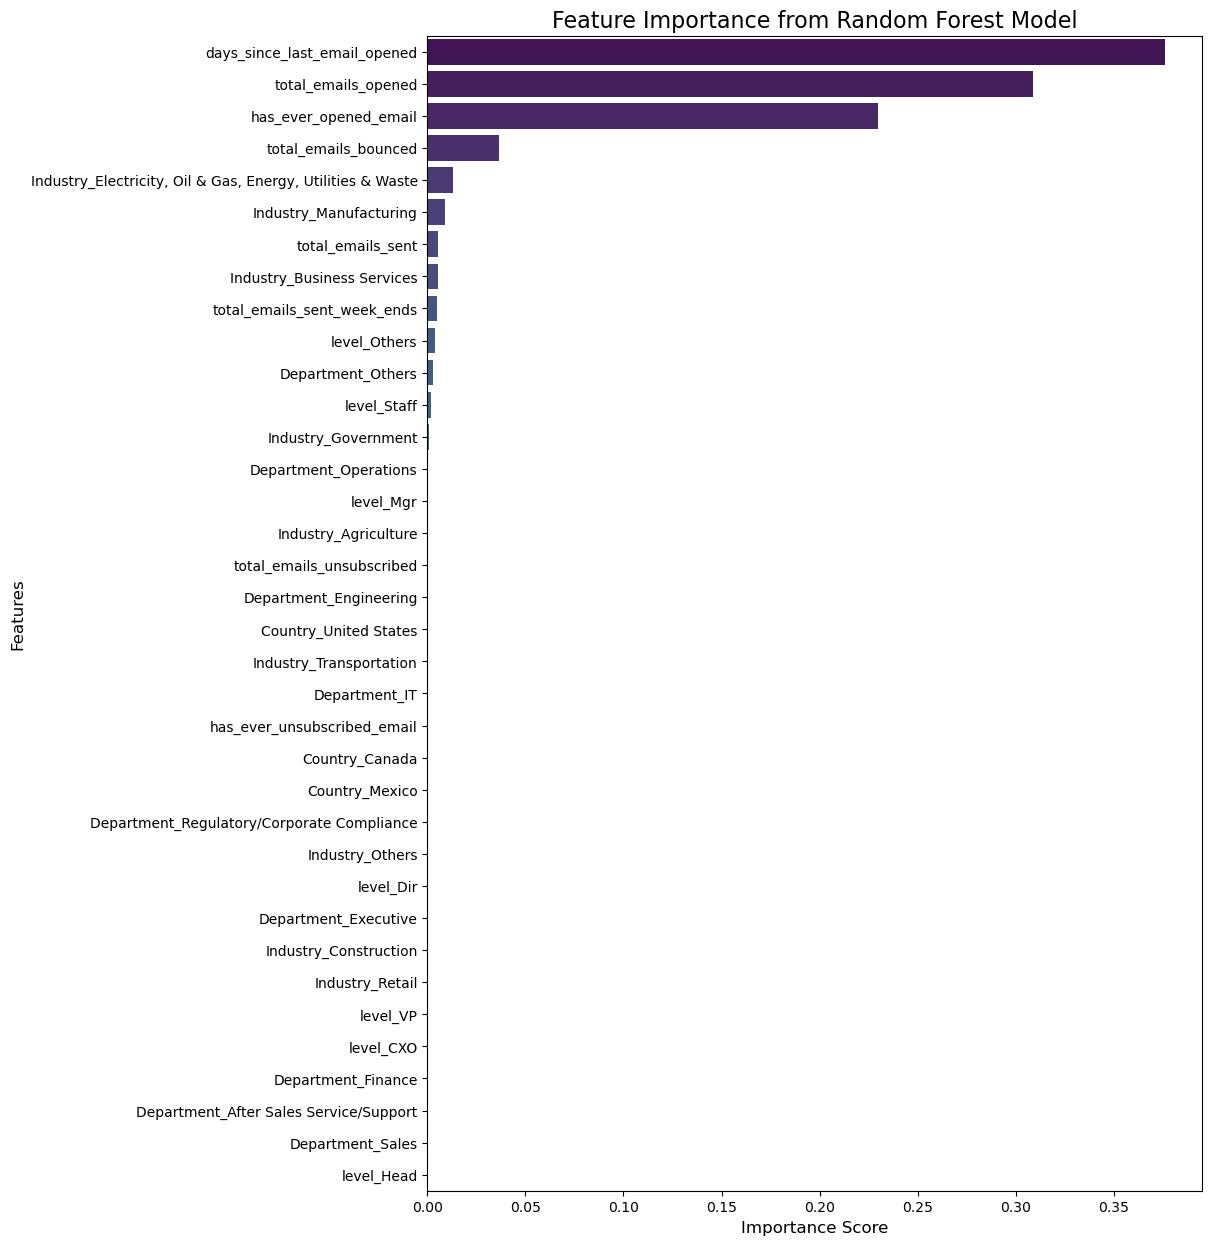

In [296]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 15))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

## SHAP Analysis

In [299]:
rf_model_explainer=shap.Explainer(rf_model,X_train,model_output="probability")

In [301]:
rf_model_shap_values = rf_model_explainer(X_test)

 96%|=================== | 56325/58416 [00:22<00:00]       

In [303]:
rf_model_shap_values_class_1 = rf_model_shap_values[..., 1]

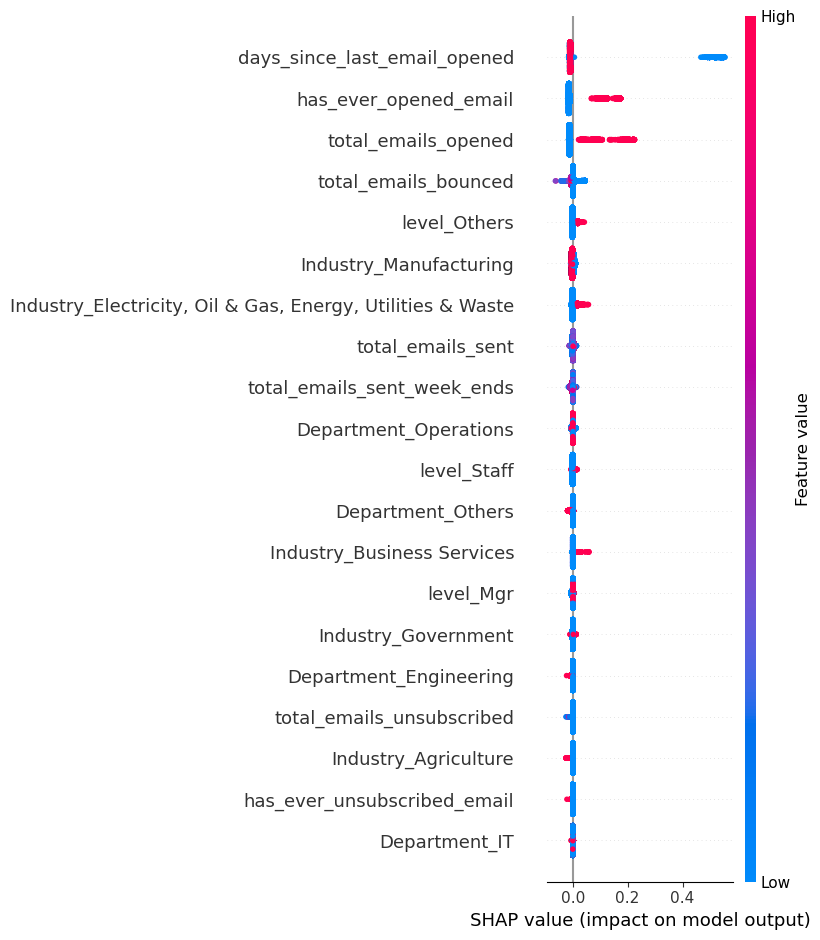

In [305]:
shap.summary_plot(rf_model_shap_values_class_1,X_test,feature_names=X_train.columns)

In [307]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [309]:
brf_model=BalancedRandomForestClassifier(n_estimators=50,max_depth=5,class_weight='balanced')

In [311]:
brf_model.fit(X_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier(class_weight='balanced', max_depth=5,
                               n_estimators=50)

In [313]:
y_pred=brf_model.predict(X_test)

In [315]:
accuracy_score(y_test,y_pred)

0.9998288140235552

In [317]:
f1_score(y_test,y_pred)

0.9984834698210494

In [319]:
confusion_matrix(y_test,y_pred)

array([[27557,     5],
       [    0,  1646]], dtype=int64)

In [321]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27562
           1       1.00      1.00      1.00      1646

    accuracy                           1.00     29208
   macro avg       1.00      1.00      1.00     29208
weighted avg       1.00      1.00      1.00     29208



C:\Users\Admin\AppData\Local\Temp\ipykernel_28724\1666366928.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


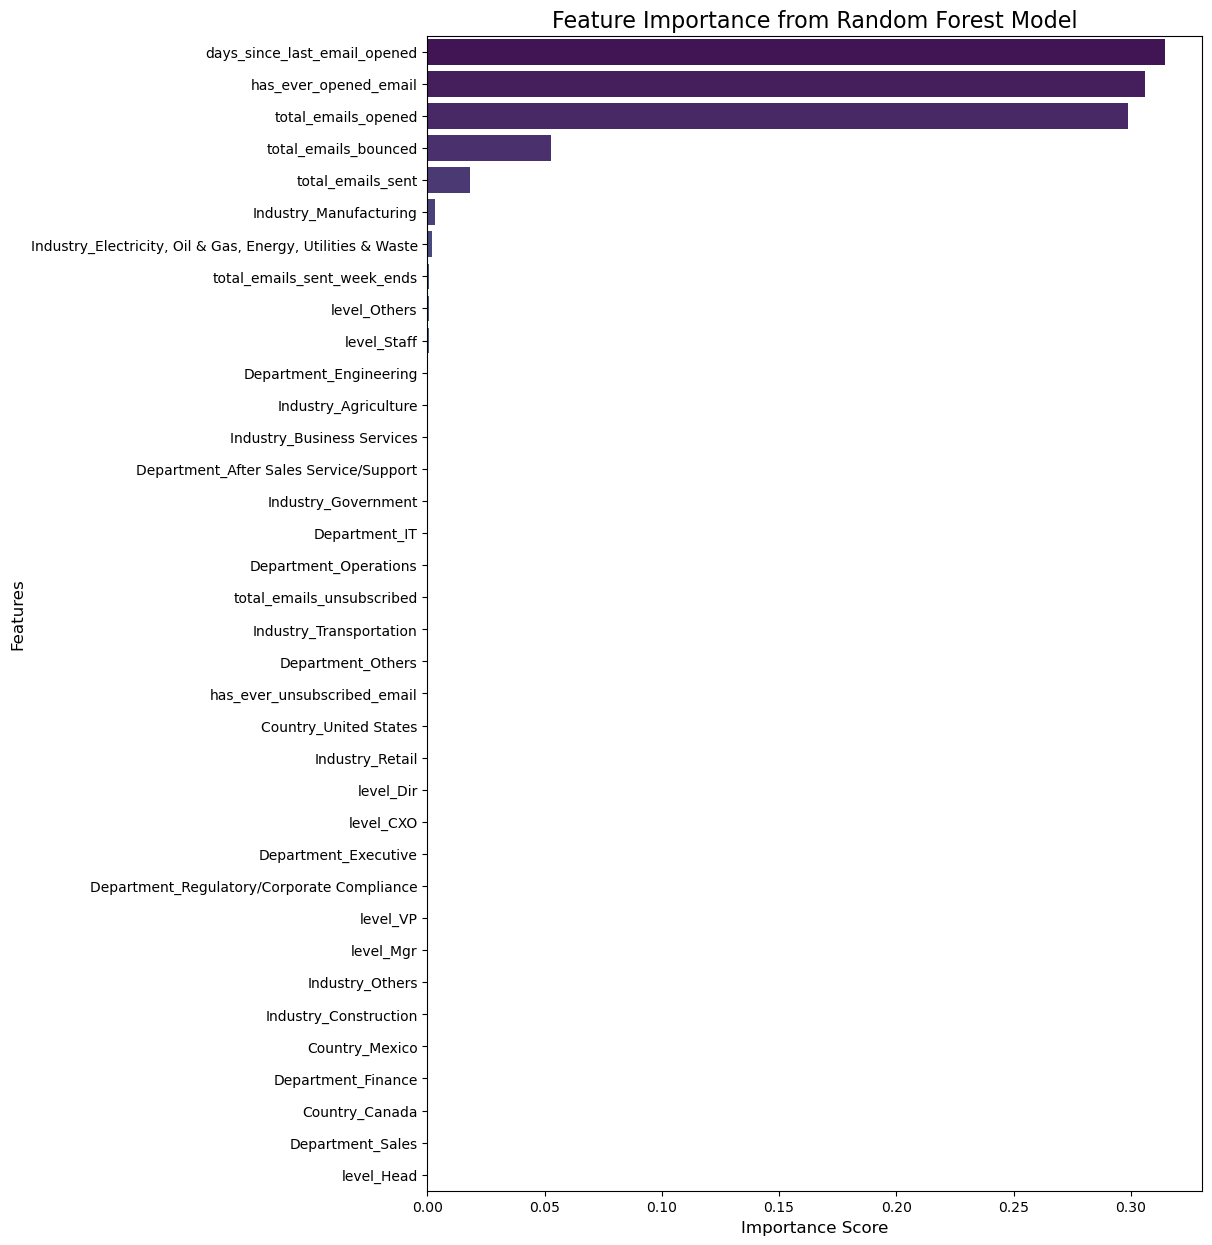

In [323]:
feature_importances = brf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 15))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)99
plt.ylabel('Features', fontsize=12)
plt.show()

In [325]:
brf_model_explainer=shap.Explainer(brf_model,X_train,model_output="probability")

In [327]:
brf_model_shap_values = brf_model_explainer(X_test)

 99%|===================| 57847/58416 [00:23<00:00]        

In [328]:
brf_model_shap_values_class_1 = brf_model_shap_values[..., 1]

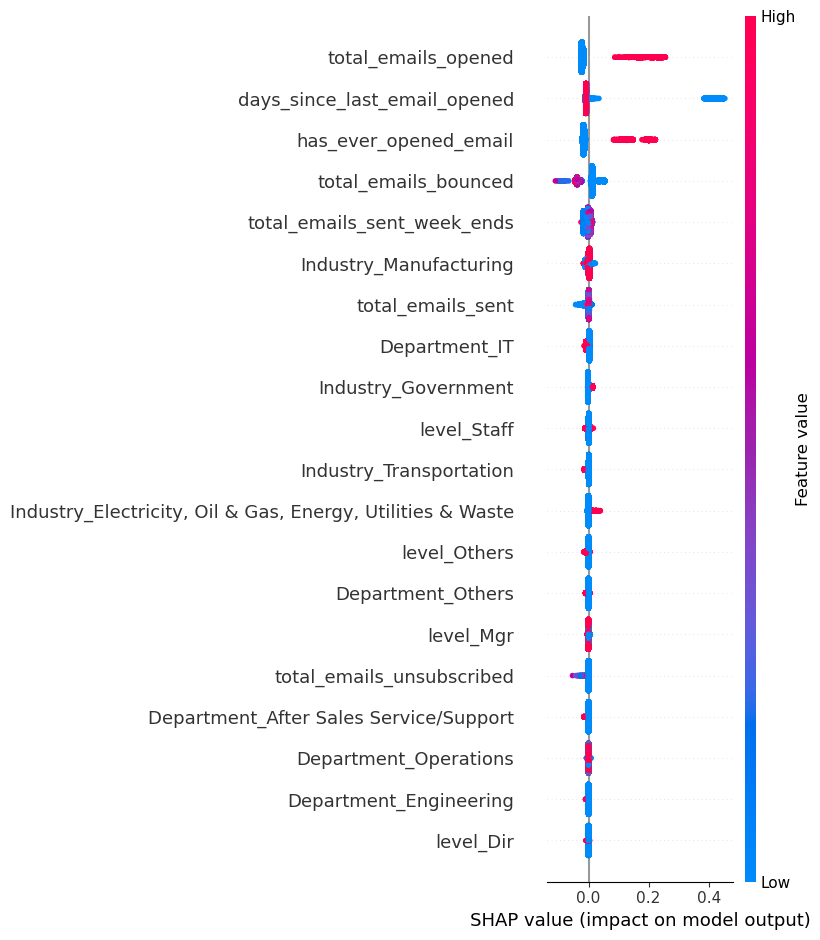

In [331]:
shap.summary_plot(brf_model_shap_values_class_1,X_test,feature_names=X_train.columns)

## Dataset 2

In [351]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146039 entries, 0 to 146038
Data columns (total 37 columns):
 #   Column                                                      Non-Null Count   Dtype  
---  ------                                                      --------------   -----  
 0   total_emails_sent                                           146039 non-null  float64
 1   total_emails_opened                                         146039 non-null  float64
 2   total_emails_bounced                                        146039 non-null  float64
 3   total_emails_unsubscribed                                   146039 non-null  float64
 4   days_since_last_email_opened                                146039 non-null  float64
 5   total_emails_sent_week_ends                                 146039 non-null  float64
 6   has_ever_opened_email                                       146039 non-null  int64  
 7   is_clicked_email                                            146039 non-nul

In [353]:
dataset_1.columns

Index(['total_emails_sent', 'total_emails_opened', 'total_emails_bounced',
       'total_emails_unsubscribed', 'days_since_last_email_opened',
       'total_emails_sent_week_ends', 'has_ever_opened_email',
       'is_clicked_email', 'has_ever_unsubscribed_email', 'level_CXO',
       'level_Dir', 'level_Head', 'level_Mgr', 'level_Others', 'level_Staff',
       'level_VP', 'Country_Canada', 'Country_Mexico', 'Country_United States',
       'Department_After Sales Service/Support', 'Department_Engineering',
       'Department_Executive', 'Department_Finance', 'Department_IT',
       'Department_Operations', 'Department_Others',
       'Department_Regulatory/Corporate Compliance', 'Department_Sales',
       'Industry_Agriculture', 'Industry_Business Services',
       'Industry_Construction',
       'Industry_Electricity, Oil & Gas, Energy, Utilities & Waste',
       'Industry_Government', 'Industry_Manufacturing', 'Industry_Others',
       'Industry_Retail', 'Industry_Transportation'],
   

In [357]:
dataset_2=dataset_1.drop(columns=['total_emails_opened','days_since_last_email_opened',])

In [359]:
X_train,X_test,y_train,y_test=train_test_split(dataset_2.drop(columns=['is_clicked_email']),dataset_2.is_clicked_email,test_size=0.2,random_state=42,stratify=dataset_2['is_clicked_email'])

In [361]:
# {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
rf_model=RandomForestClassifier(
    class_weight= 'balanced',
    max_depth=5,
    # min_samples_leaf= 2,
    # min_samples_split= 10,
    n_estimators= 50
)
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50)

In [363]:
y_pred=rf_model.predict(X_test)

In [365]:
accuracy_score(y_test,y_pred)

0.9467611613256642

In [367]:
f1_score(y_test,y_pred)

0.6790505675954592

In [369]:
confusion_matrix(y_test,y_pred)

array([[26008,  1554],
       [    1,  1645]], dtype=int64)

In [371]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     27562
           1       0.51      1.00      0.68      1646

    accuracy                           0.95     29208
   macro avg       0.76      0.97      0.83     29208
weighted avg       0.97      0.95      0.95     29208



C:\Users\Admin\AppData\Local\Temp\ipykernel_28724\3916282737.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


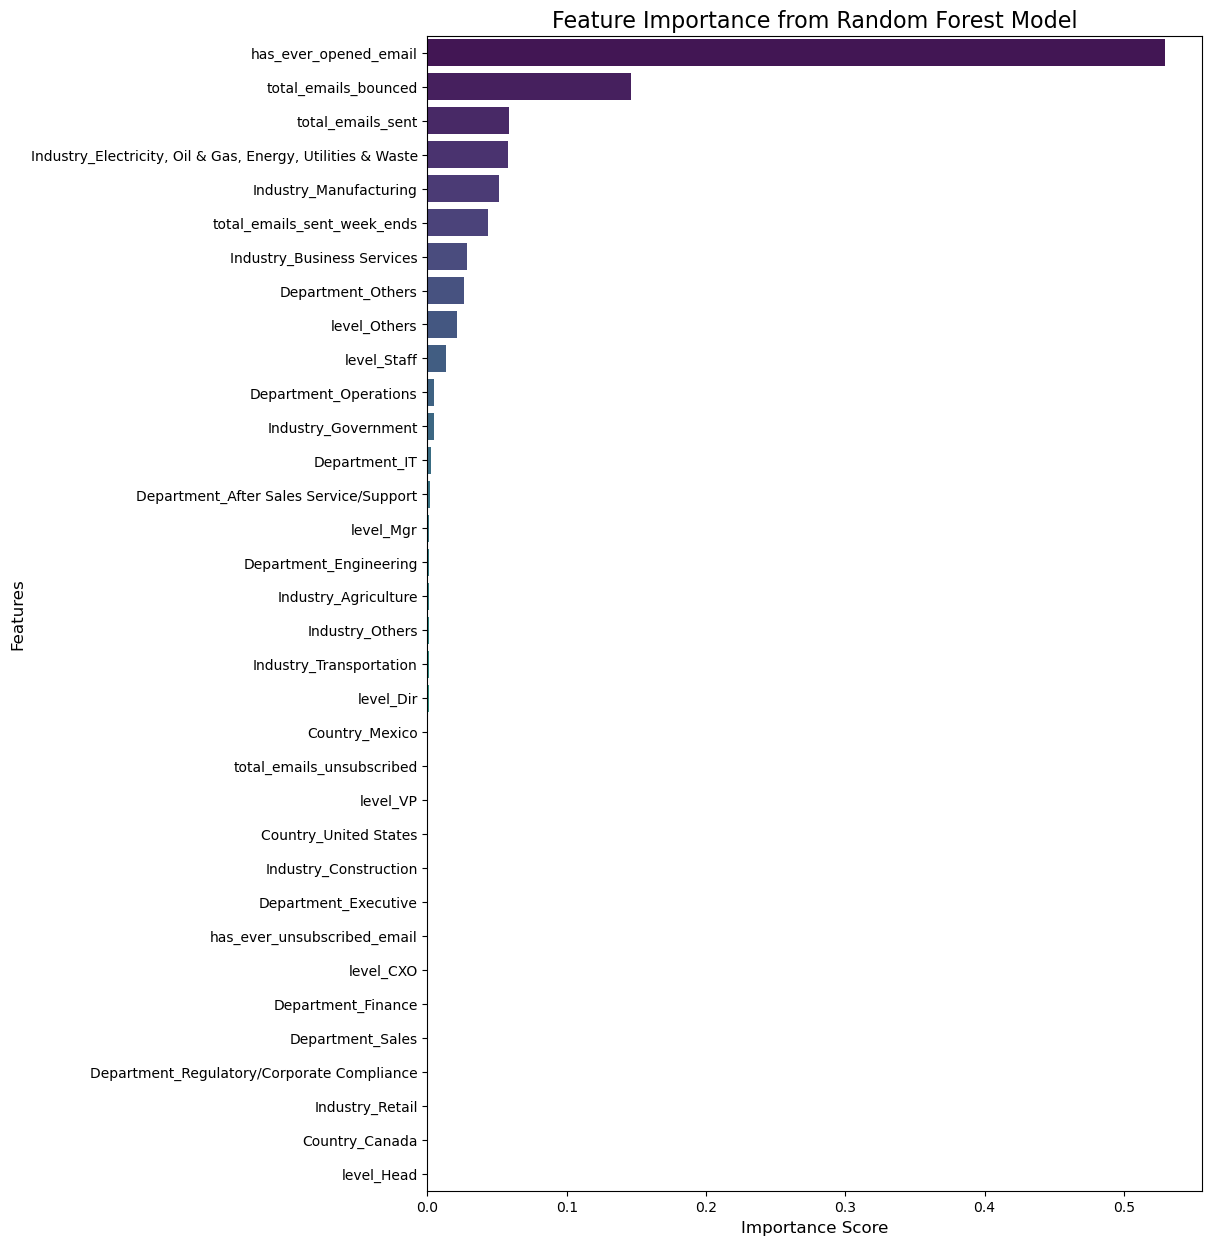

In [377]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 15))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [408]:
rf_model_explainer=shap.Explainer(rf_model,X_train,model_output="probability")
rf_model_shap_values = rf_model_explainer(X_test)
rf_model_shap_values_class_1 = rf_model_shap_values[..., 1]

 99%|===================| 57860/58416 [00:47<00:00]        

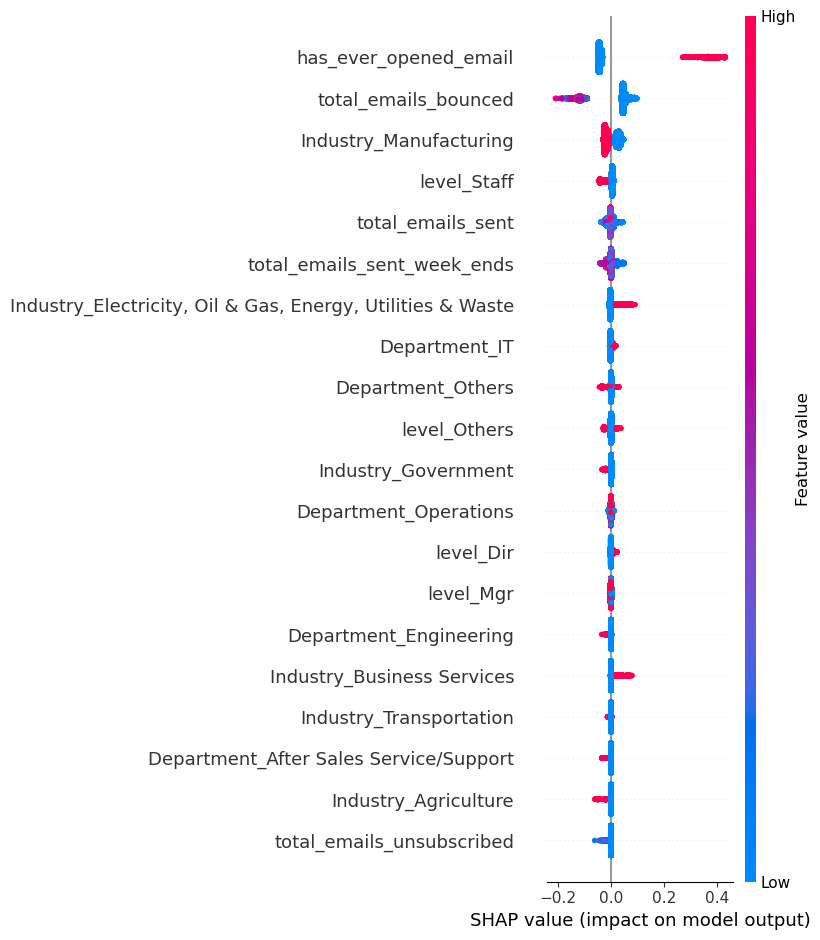

In [410]:
shap.summary_plot(rf_model_shap_values_class_1,X_test,feature_names=X_train.columns)

In [412]:
training_df.shape

(146039, 40)

In [416]:
training_df[training_df['has_ever_opened_email']==1]['is_clicked_email'].value_counts()

is_clicked_email
1    8232
0    7634
Name: count, dtype: int64

In [418]:
brf_model=BalancedRandomForestClassifier(n_estimators=50,max_depth=5,class_weight='balanced')

In [420]:
brf_model.fit(X_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier(class_weight='balanced', max_depth=5,
                               n_estimators=50)

In [422]:
y_pred=brf_model.predict(X_test)

In [424]:
accuracy_score(y_test,y_pred)

0.94326896740619

In [426]:
f1_score(y_test,y_pred)

0.6651848858355224

In [428]:
confusion_matrix(y_test,y_pred)

array([[25905,  1657],
       [    0,  1646]], dtype=int64)

In [430]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     27562
           1       0.50      1.00      0.67      1646

    accuracy                           0.94     29208
   macro avg       0.75      0.97      0.82     29208
weighted avg       0.97      0.94      0.95     29208



C:\Users\Admin\AppData\Local\Temp\ipykernel_28724\1666366928.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


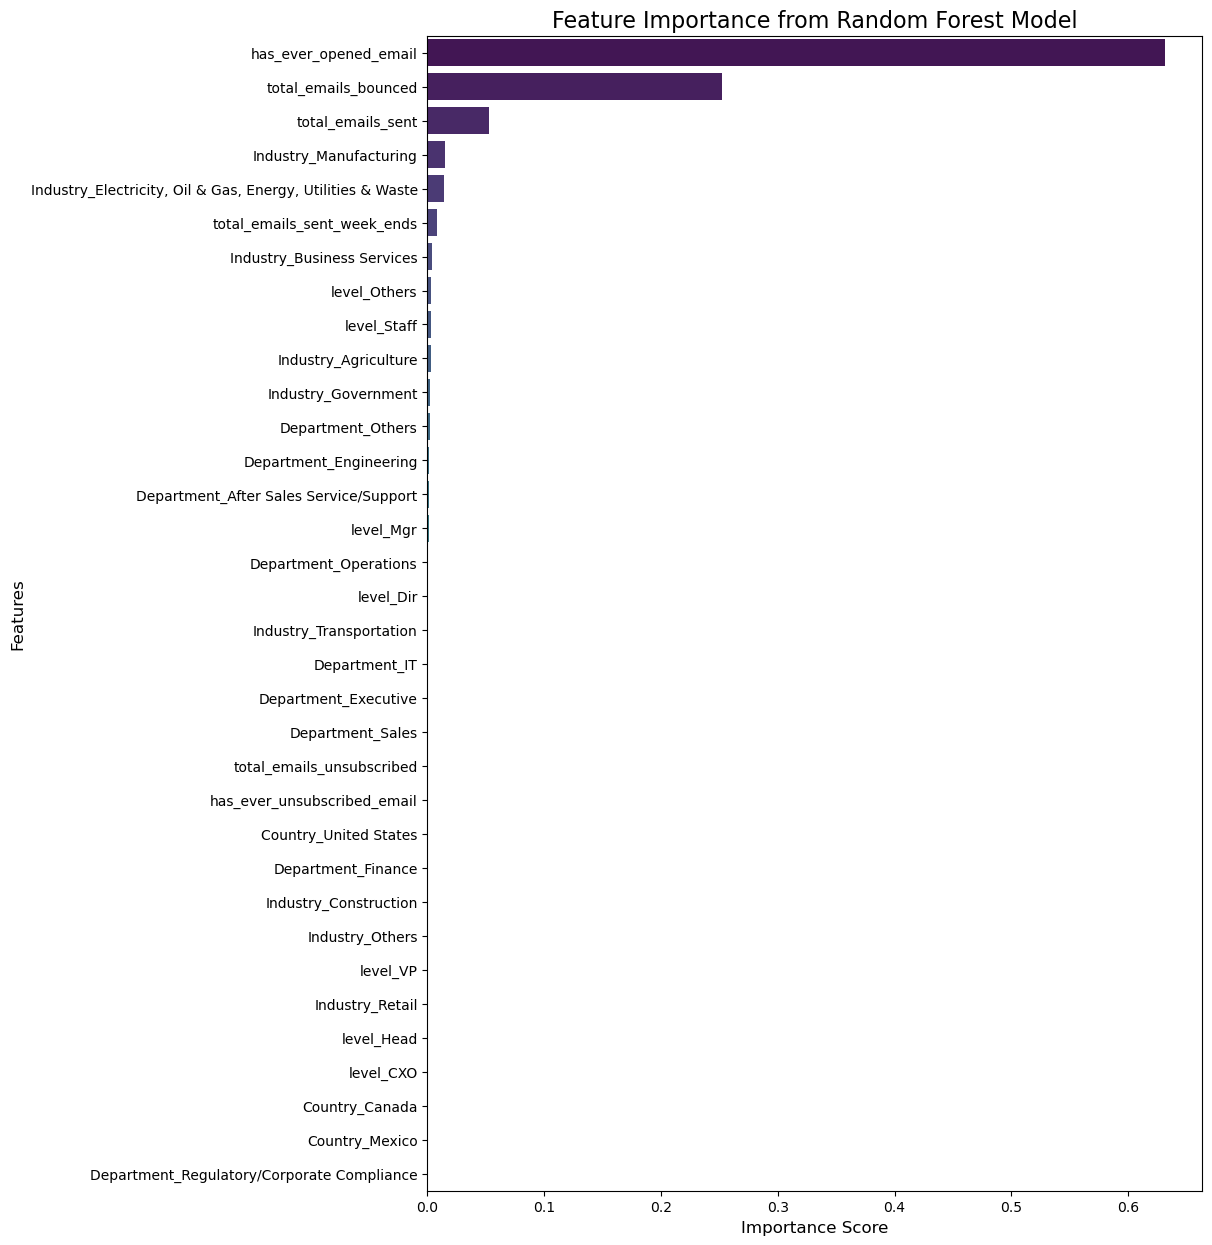

In [432]:
feature_importances = brf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 15))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [434]:
brf_model_explainer=shap.Explainer(brf_model,X_train,model_output="probability")
brf_model_shap_values = brf_model_explainer(X_test)
brf_model_shap_values_class_1 = brf_model_shap_values[..., 1]

 97%|=================== | 56932/58416 [00:34<00:00]       

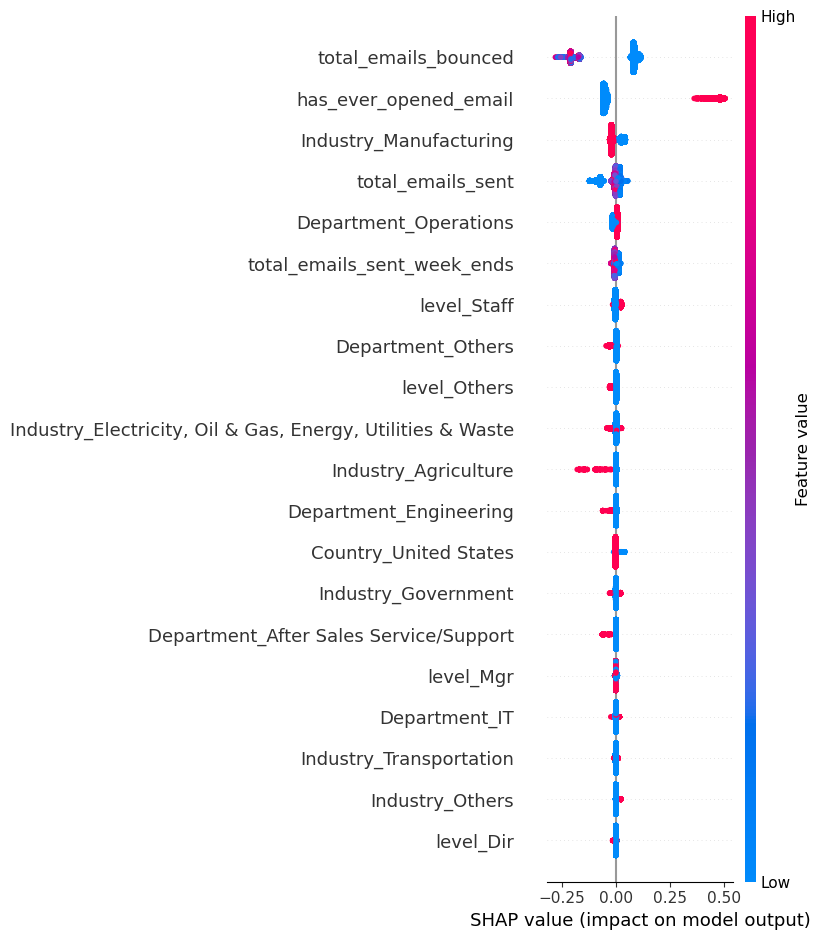

In [436]:
shap.summary_plot(brf_model_shap_values_class_1,X_test,feature_names=X_train.columns)